In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys

Load whole data

In [4]:
filename = '#1_3min_pad1_ms1000ms.txt'
rawData = np.genfromtxt(filename)

In [5]:
copy_data = rawData.copy()
add = np.zeros((len(copy_data), 1), dtype='float')
copy_data = np.append(copy_data, add, axis = 1)

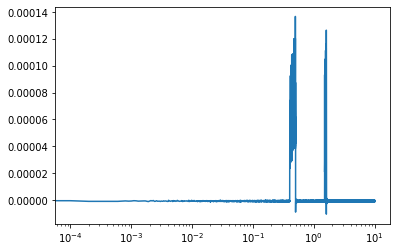

In [6]:
plt.plot(copy_data[0:len(copy_data),0], copy_data[0:len(copy_data), 1])
plt.xscale("log")
plt.show()

In [7]:
for i in range(len(copy_data)-1):
    h = copy_data[1][0]
    f_0 = copy_data[i][1]
    f_1 = copy_data[i+1][1]
    copy_data[i][2] = (f_1 - f_0)/h

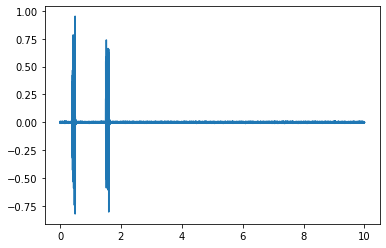

In [8]:
plt.plot(copy_data[0:len(copy_data),0], copy_data[0:len(copy_data), 2])
plt.xscale("linear")
plt.show()

In [9]:
for i in range(len(copy_data)-1, -1, -1):
    if copy_data[i][2] < -0.2:
        x_second_idx = i
        break

print(x_second_idx)

16000


In [10]:
interval = input("input interval")
pulse_width = input("input pulse width")

subtract = int(interval) + int(pulse_width)  #  * 1/(copy_data[1][0] 의 반올림*1000(ms))
subtract_round = subtract / (round(h, 7)*1000)
x_first_idx = int(x_second_idx - subtract_round)

print(subtract)
print(subtract_round)
print(x_first_idx)

1100
11000.0
5000


In [11]:
x_first_time = copy_data[x_first_idx][0]
x_second_time = copy_data[x_second_idx][0]
x_first_value = copy_data[x_first_idx][1]
x_second_value = copy_data[x_second_idx][1]

ppf = x_second_value / x_first_value

print(interval,"    ",x_first_time,"    ",x_second_time,"    ",ppf)

1000      0.500005      1.600016      1.0919341753261858
